In [48]:
import getpass 
print(getpass.getuser())
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram 

joan_


In [49]:
secretnumber = '100000'    #the goal is to generalize the code so it works with any secret number

In [50]:
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))        #returns as many classical bytes as there are bytes in the secret number

#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))     #returns an array of numbers from 0 to 5 for a range for any secret number
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()

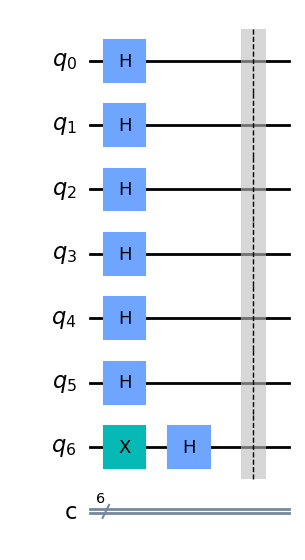

In [51]:
circuit.draw(output='mpl')

In [52]:
from tkinter.messagebox import YESNO


for ii, YESNO in enumerate(reversed(secretnumber)):       #reversing in descending order from ascending in order to get more range
    if YESNO == '1':
        circuit.cx(ii, len(secretnumber))

In [53]:
circuit.barrier()
#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))
circuit.barrier()
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

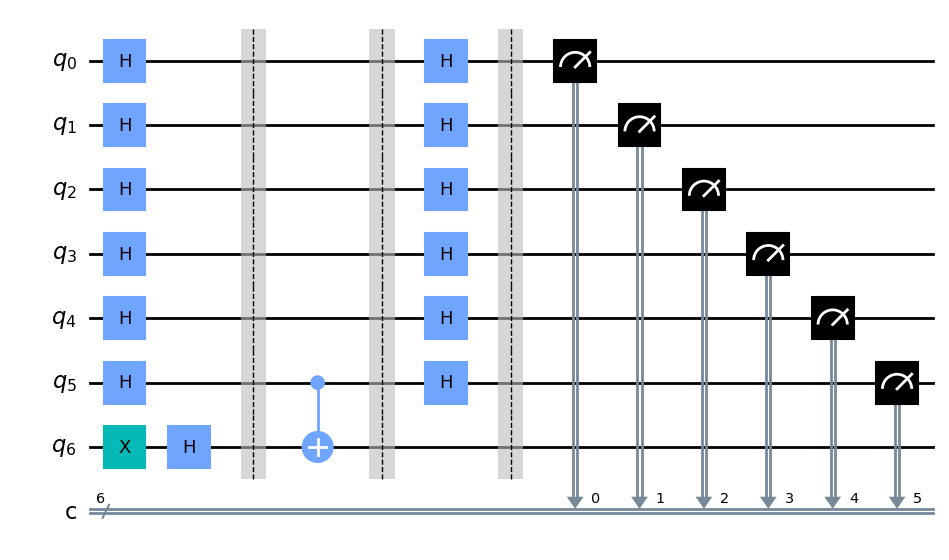

In [54]:
circuit.draw(output='mpl')

In [55]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()

In [56]:
print(counts)  

{'100000': 1}
